# 整体数据集 Emotion

In [1]:
import pandas as pd
pd.set_option('max_colwidth', 200)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

plt.rcParams['figure.dpi'] = 100

In [2]:
rumor_df = pd.read_csv('./emotion_rumor.csv')
truth_df = pd.read_csv('./emotion_truth.csv')

len(rumor_df), len(truth_df)

(16841, 16965)

In [3]:
rumor_df.head()

,category,content,index,label,publisher_emotion,dataset
0,社会生活,，帮忙转一下，找一名职中学生，叫刘冻雪，16岁，请速回鲁甸县医院，妈妈在地震伤的很严重，想最后见她一面，姐姐号码：13751977218，爱心接力，不转对不起自己，好人有好报2花园南路,16074,1,none,train
1,社会生活,请帮忙，求转本人：曹艳，电话13762612323今天上午的2岁女儿在增城大润发附近被人拐走了，女儿能说出她爸爸的手机号码从监控上看是被一个四十多岁男人抱走了现我们家老太太都急疯了有知情者请告之万分感谢看到信息的兄弟姐妹留意一下联系人张明均如果看一眼懒得转的冷漠人也请你伸出手指按3秒看到就转转吧我们都会有孩子谢谢你2东莞·横沥镇,16075,1,none,train
2,社会生活,寻人启事13940292999。有线索酬金10万帮忙扩散，今天上午一个三岁多小女孩在锦绣花园小区附近被人拐走了，小女孩能说出她爸爸的手机号码从监控上看是被一个四十多岁男人抱走了现大人都急疯了有知情者请告之万分感谢看到信息的兄弟姐妹留意一下联系人宁继春13940292999,16076,1,none,train
3,社会生活,雅安總人口153萬，三星蘋果富士康三家公司總共捐款加起來是1億6000萬，平均分給每個人是105萬左右。現在還在缺物資，缺錢，各地方各組織各學校還在圈錢。錢去哪了我們不知道，真的不知道該說啥。我只想問。錢呢。給老百姓們的錢呢。,16077,1,none,train
4,社会生活,我想成为你最心动的相遇和最不舍的告别；广西平南。一男子闯入午托居民屋刀砍16名儿童致3死13伤,16078,1,angry,train


In [20]:
def get_full_df(r_df, t_df, emotion_type):
    r_df['label'] = 1
    t_df['label'] = 0

    df = pd.concat((r_df, t_df))
    
    a = df[df['label'] == 1]['publisher_emotion'].value_counts() / \
        len(rumor_df)
    b = df[df['label'] == 0]['publisher_emotion'].value_counts() / \
        len(truth_df)
        
    keys = ['none', 'angry', 'happy', 'sad', 'fearful', 'disgusting']
    keys.sort()
    
    # 处理未出现的key
    for v in [a, b]:
        for key in keys:
            if key not in v:
                v[key] = 0.0
    
    r = pd.DataFrame({'emotion': keys, 'publisher_emotion': [
                     a[key] for key in keys]})
    t = pd.DataFrame({'emotion': keys, 'publisher_emotion': [
                     b[key] for key in keys]})

    r['label'] = 'Fake News'
    t['label'] = 'Real News'
    hue_df = pd.concat((r, t))

    # 输出差值
    print('{}: (Fake news - Real News) = '.format(emotion_type))
    for key in keys:
        print('{}: {:.2%}'.format(key, a[key] - b[key]))

    return hue_df

def show_bar_hue(r_df, t_df, emotion_type, title):
    hue_df = get_full_df(r_df, t_df, emotion_type)

#     plt.rcParams['figure.dpi'] = 500
    ax = sns.barplot(x='emotion', y=emotion_type, hue="label", data=hue_df)

    ax.legend().set_title(title)
#     ax.legend(prop={'size':17})

#     ax.set_xlabel(ax.get_xlabel(), fontsize=18, x=0.9)
#     ax.set_ylabel(ax.get_ylabel(), fontsize=18)
#     ax.tick_params(labelsize=18)
#     ax.set_xbound(lower=0.05, upper=0.35)
    plt.show()

In [4]:
print(rumor_df['publisher_emotion'].value_counts())
print()
print(truth_df['publisher_emotion'].value_counts())

none          14832
angry          1424
disgusting      522
happy            43
sad              15
fearful           5
Name: publisher_emotion, dtype: int64

none          15553
angry           668
disgusting      532
happy           192
sad              15
fearful           5
Name: publisher_emotion, dtype: int64


Publisher Emotion: (Fake news - Real News) = 
angry: 4.52%
disgusting: -0.04%
fearful: 0.00%
happy: -0.88%
none: -3.61%
sad: 0.00%


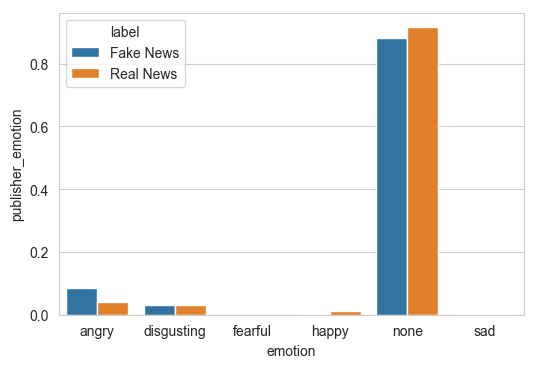

In [6]:
show_bar_hue(rumor_df, truth_df, 'publisher_emotion')

# Train

In [7]:
rumor_df.head()

,category,content,index,label,publisher_emotion,dataset
0,社会生活,，帮忙转一下，找一名职中学生，叫刘冻雪，16岁，请速回鲁甸县医院，妈妈在地震伤的很严重，想最后见她一面，姐姐号码：13751977218，爱心接力，不转对不起自己，好人有好报2花园南路,16074,1,none,train
1,社会生活,请帮忙，求转本人：曹艳，电话13762612323今天上午的2岁女儿在增城大润发附近被人拐走了，女儿能说出她爸爸的手机号码从监控上看是被一个四十多岁男人抱走了现我们家老太太都急疯了有知情者请告之万分感谢看到信息的兄弟姐妹留意一下联系人张明均如果看一眼懒得转的冷漠人也请你伸出手指按3秒看到就转转吧我们都会有孩子谢谢你2东莞·横沥镇,16075,1,none,train
2,社会生活,寻人启事13940292999。有线索酬金10万帮忙扩散，今天上午一个三岁多小女孩在锦绣花园小区附近被人拐走了，小女孩能说出她爸爸的手机号码从监控上看是被一个四十多岁男人抱走了现大人都急疯了有知情者请告之万分感谢看到信息的兄弟姐妹留意一下联系人宁继春13940292999,16076,1,none,train
3,社会生活,雅安總人口153萬，三星蘋果富士康三家公司總共捐款加起來是1億6000萬，平均分給每個人是105萬左右。現在還在缺物資，缺錢，各地方各組織各學校還在圈錢。錢去哪了我們不知道，真的不知道該說啥。我只想問。錢呢。給老百姓們的錢呢。,16077,1,none,train
4,社会生活,我想成为你最心动的相遇和最不舍的告别；广西平南。一男子闯入午托居民屋刀砍16名儿童致3死13伤,16078,1,angry,train


In [9]:
train_rumor_df = rumor_df[rumor_df['dataset']=='train']
train_truth_df = truth_df[truth_df['dataset']=='train']

len(train_rumor_df), len(train_truth_df), len(train_rumor_df) + len(train_truth_df)

(16119, 16074, 32193)

In [10]:
print(train_rumor_df['publisher_emotion'].value_counts())
print()
print(train_truth_df['publisher_emotion'].value_counts())

none          14160
angry          1400
disgusting      496
happy            43
sad              15
fearful           5
Name: publisher_emotion, dtype: int64

none          14704
angry           645
disgusting      526
happy           179
sad              15
fearful           5
Name: publisher_emotion, dtype: int64


/Users/snow/anaconda2/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/snow/anaconda2/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Publisher Emotion: (Fake news - Real News) = 
angry: 4.51%
disgusting: -0.16%
fearful: 0.00%
happy: -0.80%
none: -2.59%
sad: 0.00%


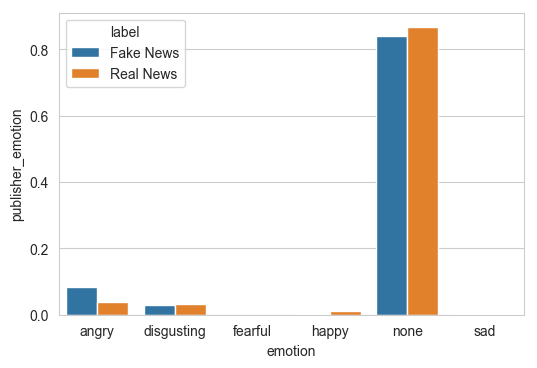

In [11]:
show_bar_hue(train_rumor_df, train_truth_df, 'publisher_emotion')

# Test

In [12]:
test_rumor_df = rumor_df[rumor_df['dataset']=='test']
test_truth_df = truth_df[truth_df['dataset']=='test']

len(test_rumor_df), len(test_truth_df), len(test_rumor_df) + len(test_truth_df)

(722, 891, 1613)

In [13]:
print(test_rumor_df['publisher_emotion'].value_counts())
print()
print(test_truth_df['publisher_emotion'].value_counts())

none          672
disgusting     26
angry          24
Name: publisher_emotion, dtype: int64

none          849
angry          23
happy          13
disgusting      6
Name: publisher_emotion, dtype: int64


/Users/snow/anaconda2/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/snow/anaconda2/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Publisher Emotion: (Fake news - Real News) = 
angry: 0.01%
disgusting: 0.12%
fearful: 0.00%
happy: -0.08%
none: -1.01%
sad: 0.00%


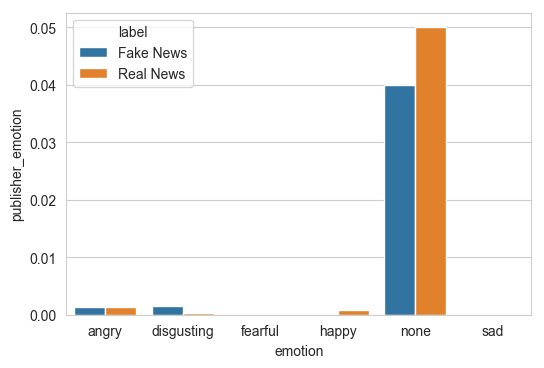

In [14]:
show_bar_hue(test_rumor_df, test_truth_df, 'publisher_emotion')

# Emotion 与 Topic 的关系

In [6]:
def find_topic_dfs(topic):
    r_df = rumor_df[rumor_df['category']==topic]
    t_df = truth_df[truth_df['category']==topic]
    print(len(r_df), len(t_df))
    return r_df, t_df

In [8]:
rumor_df['category'].value_counts()

社会生活    10203
医药健康     3321
文体娱乐     1267
财经商业      693
政治        571
教育考试      509
军事        151
科技        126
Name: category, dtype: int64

In [10]:
topics = list(set(rumor_df['category'].tolist()))
topics.sort()
topics

['军事', '医药健康', '政治', '教育考试', '文体娱乐', '社会生活', '科技', '财经商业']

In [ ]:
topics2eng = {'军事':'military', '医药健康':'health', '政治':'politics', '教育考试':'education', ''}

In [14]:
plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签

151 221
军事
publisher_emotion: (Fake news - Real News) = 
angry: 0.06%
disgusting: -0.01%
fearful: 0.00%
happy: -0.01%
none: -0.45%
sad: 0.00%


/Users/snow/anaconda2/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/snow/anaconda2/envs/python35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


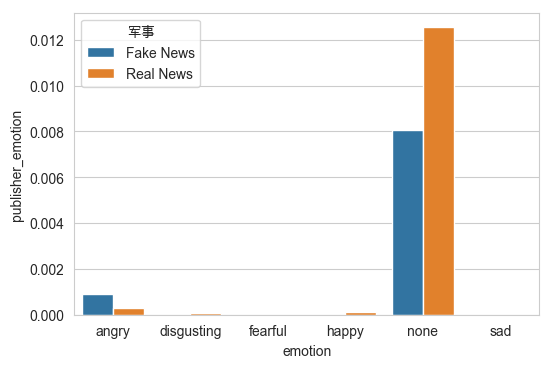

3321 2999
医药健康
publisher_emotion: (Fake news - Real News) = 
angry: 1.71%
disgusting: 0.12%
fearful: 0.00%
happy: -0.13%
none: 0.35%
sad: -0.01%


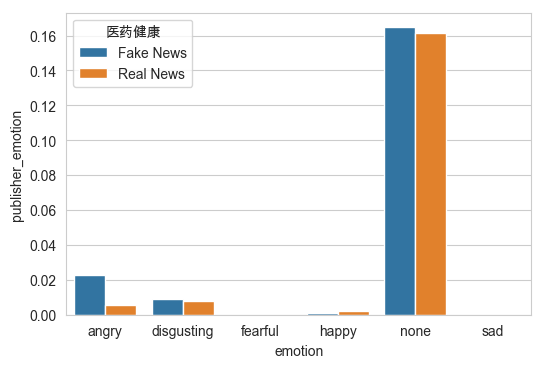

571 670
政治
publisher_emotion: (Fake news - Real News) = 
angry: -0.05%
disgusting: 0.12%
fearful: 0.00%
happy: -0.06%
none: -0.57%
sad: 0.00%


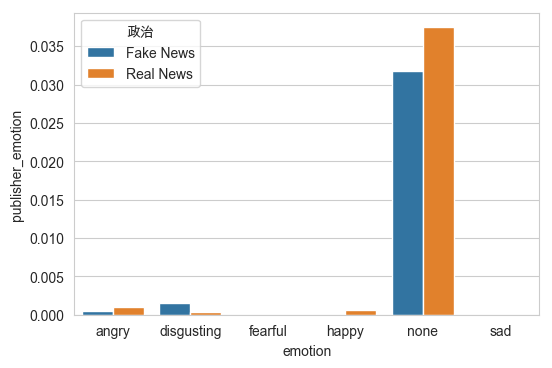

509 392
教育考试
publisher_emotion: (Fake news - Real News) = 
angry: -0.14%
disgusting: -0.15%
fearful: 0.00%
happy: -0.01%
none: 1.01%
sad: 0.00%


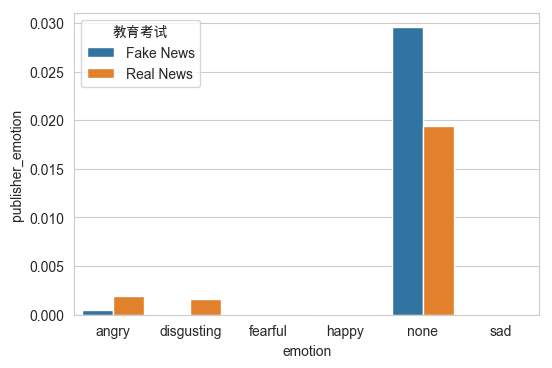

1267 1353
文体娱乐
publisher_emotion: (Fake news - Real News) = 
angry: 0.35%
disgusting: 0.07%
fearful: 0.00%
happy: -0.21%
none: -0.66%
sad: -0.01%


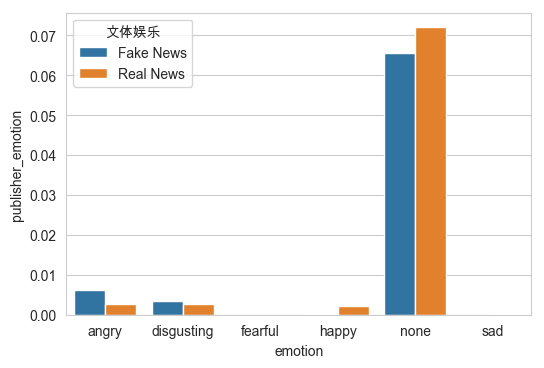

10203 10413
社会生活
publisher_emotion: (Fake news - Real News) = 
angry: 2.43%
disgusting: -0.22%
fearful: 0.00%
happy: -0.47%
none: -2.55%
sad: 0.01%


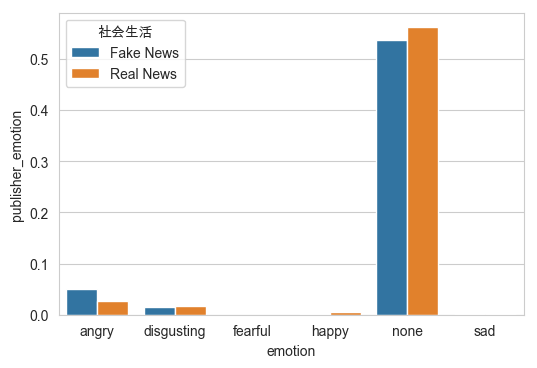

126 155
科技
publisher_emotion: (Fake news - Real News) = 
angry: -0.01%
disgusting: -0.04%
fearful: 0.00%
happy: -0.01%
none: -0.12%
sad: 0.01%


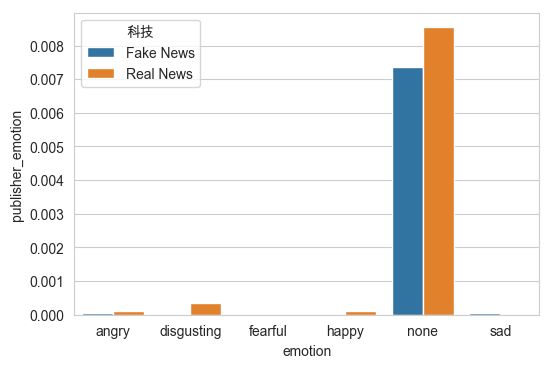

693 762
财经商业
publisher_emotion: (Fake news - Real News) = 
angry: 0.16%
disgusting: 0.07%
fearful: 0.00%
happy: 0.02%
none: -0.63%
sad: 0.00%


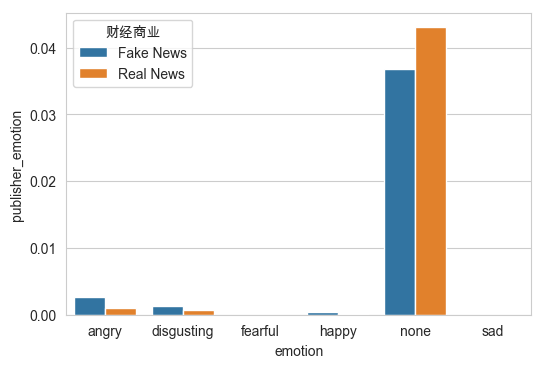

In [21]:
for t in topics:
    r_df, t_df = find_topic_dfs(t)
    print(t)
    show_bar_hue(r_df, t_df, emotion_type='publisher_emotion', title=t)